# IMPORTING NECESSARY LIBRARIES

In [1]:
import cv2
import libopencv

In [42]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from __future__ import print_function
import numpy as np
from tensorflow import keras
from keras import layers
from keras.models import Sequential, Model
from keras.layers import GlobalMaxPooling2D , MaxPool2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,AveragePooling2D,concatenate

In [3]:
dataset_path = os.listdir()
dataset_path

['.ipynb_checkpoints',
 'aug',
 'augmentation.ipynb',
 'cnn_cfd.ipynb',
 'data',
 'LAMINAR_TEST.png',
 'log',
 'turbulent.jpeg',
 'TURBULENT_TEST.png',
 'U_30_d_3_n_10^-1.png']

In [4]:
image_type = os.listdir('data')
image_type

['laminar', 'turbulent']

In [5]:
images = []
for item in image_type:
    image_path = os.listdir('data'+'/'+item)
    for img in image_path:
        images.append((item,str('data'+'/'+item)+'/'+img))
print(len(images))
print(len(images[0]))

291
2


In [6]:
image_df = pd.DataFrame(data=images,columns=['image_type','image'])
image_df.head()

,image_type,image
0,laminar,data/laminar/lamianr.png
1,laminar,data/laminar/laminar.jpg
2,laminar,data/laminar/laminar1.png
3,laminar,data/laminar/laminar10.png
4,laminar,data/laminar/laminar11.png


In [7]:
image_df.value_counts('image_type')

image_type
turbulent    154
laminar      137
dtype: int64

In [8]:
img = []
label = []
for item in images:
    pic = cv2.imread(item[1])
    pic = cv2.resize(pic,(512,256))
    img.append(pic)
    label.append(item[0])
img = np.array(img)
img.shape

(291, 256, 512, 3)

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = image_df['image_type'].values
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
y = y.reshape(-1,1)
# y_hot = OneHotEncoder()
# y = y_hot.fit_transform(y)
print(y.shape)

(291, 1)


In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

img , y = shuffle(img,y,random_state=42)
X_train_val,X_test,Y_train_val,Y_test = train_test_split(img,y,test_size=0.1,random_state=42)
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.1,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(234, 256, 512, 3)
(30, 256, 512, 3)
(234, 1)
(30, 1)
(27, 256, 512, 3)
(27, 1)


1 is assigned to turbulent and 0 is to laminar

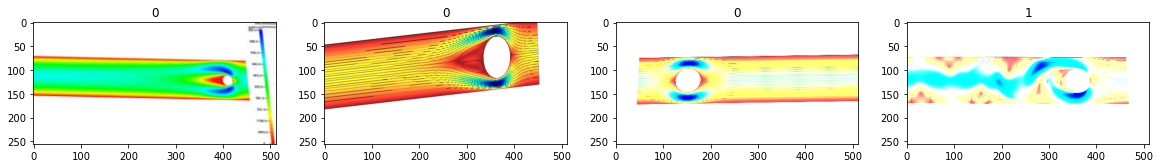

In [11]:
img, ax=plt.subplots(ncols=4, figsize=(20,20))
for i in range(0,4):
    ax[i].imshow(X_train[i])
    ax[i].title.set_text(Y_train[i][0])
# print(Y_train)

In [12]:
logdir='log'

In [13]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

# AlexNet

In [14]:
AlexNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,512,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='softmax')
])

In [15]:
AlexNet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [16]:
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 126, 96)       34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 126, 96)      384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 62, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 62, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 62, 256)      1024      
 hNormalization)                                                 
                                                        

In [20]:
hist = AlexNet.fit(X_train,Y_train,
          epochs=5,
          validation_data=(X_val,Y_val),
          validation_freq=1,
          callbacks=[tensorboard_callback])

Epoch 1/5
8/8 [==============================] - 33s 4s/step - loss: 11.8727 - accuracy: 0.5470 - val_loss: 1470.6334 - val_accuracy: 0.4444
Epoch 2/5
8/8 [==============================] - 36s 4s/step - loss: 3.2659 - accuracy: 0.5470 - val_loss: 6420.5649 - val_accuracy: 0.4444
Epoch 3/5
8/8 [==============================] - 36s 5s/step - loss: 1.3723 - accuracy: 0.5470 - val_loss: 2551.7705 - val_accuracy: 0.4444
Epoch 4/5
8/8 [==============================] - 36s 4s/step - loss: 2.2315 - accuracy: 0.5470 - val_loss: 3119.2410 - val_accuracy: 0.4444
Epoch 5/5
8/8 [==============================] - 36s 4s/step - loss: 1.5935 - accuracy: 0.5470 - val_loss: 4221.2363 - val_accuracy: 0.4444


# PLOTTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

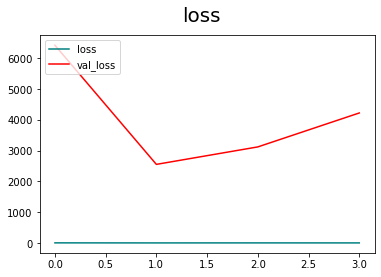

In [21]:
fig=plt.figure()
plt.plot(hist.history['loss'][1:],color='teal',label='loss',)
plt.plot(hist.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

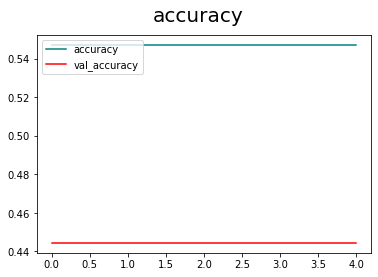

In [22]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [23]:
preds = AlexNet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 1s 843ms/step - loss: 4053.0608 - accuracy: 0.4667
Loss = 4053.060791015625
Test Accuracy = 0.46666666865348816


# Lenet-5

# TESTING ON RANDOM INTERNET IMAGES TO CHECK OVERFITTING OF DATA
## Model performed quite well on the unseen data from internet

In [35]:
Lenet = keras.Sequential()
Lenet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(256,512,3)))
Lenet.add(layers.AveragePooling2D())

Lenet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
Lenet.add(layers.AveragePooling2D())

Lenet.add(layers.Flatten())

Lenet.add(layers.Dense(units=120, activation='relu'))

Lenet.add(layers.Dense(units=84, activation='relu'))

Lenet.add(layers.Dense(units=1, activation = 'softmax'))

In [36]:
Lenet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
Lenet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 510, 6)       168       
                                                                 
 average_pooling2d_4 (Averag  (None, 127, 255, 6)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 253, 16)      880       
                                                                 
 average_pooling2d_5 (Averag  (None, 62, 126, 16)      0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 124992)            0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [37]:
histL=Lenet.fit(X_train,Y_train,
          epochs=5,
          validation_data=(X_val,Y_val),
          validation_freq=1,
          callbacks=[tensorboard_callback])

Epoch 1/5
8/8 [==============================] - 8s 800ms/step - loss: 910.5234 - accuracy: 0.5470 - val_loss: 217.5295 - val_accuracy: 0.4444
Epoch 2/5
8/8 [==============================] - 6s 783ms/step - loss: 172.0070 - accuracy: 0.5470 - val_loss: 99.9599 - val_accuracy: 0.4444
Epoch 3/5
8/8 [==============================] - 6s 802ms/step - loss: 51.9004 - accuracy: 0.5470 - val_loss: 11.0235 - val_accuracy: 0.4444
Epoch 4/5
8/8 [==============================] - 6s 753ms/step - loss: 8.9934 - accuracy: 0.5470 - val_loss: 2.9447 - val_accuracy: 0.4444
Epoch 5/5
8/8 [==============================] - 6s 793ms/step - loss: 7.5707 - accuracy: 0.5470 - val_loss: 10.7740 - val_accuracy: 0.4444


# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

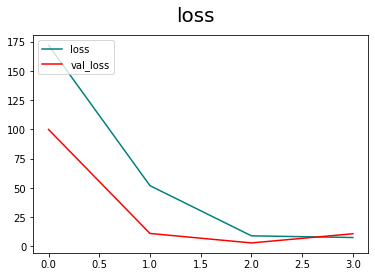

In [38]:
fig=plt.figure()
plt.plot(histL.history['loss'][1:],color='teal',label='loss',)
plt.plot(histL.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

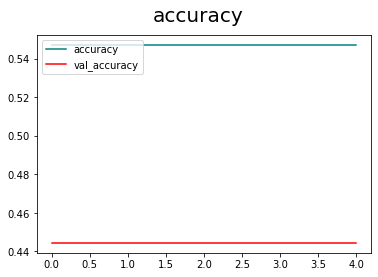

In [39]:
fig=plt.figure()
plt.plot(histL.history['accuracy'],color='teal',label='accuracy')
plt.plot(histL.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [40]:
preds = Lenet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 235ms/step - loss: 25.1394 - accuracy: 0.4667
Loss = 25.139423370361328
Test Accuracy = 0.46666666865348816


# VGG16

In [50]:
VGG16 = Sequential()
VGG16.add(Conv2D(input_shape=(256,512,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16.add(layers.Flatten())
VGG16.add(layers.Dense(4096, activation='relu'))
VGG16.add(layers.Dense(4096, activation='relu'))
VGG16.add(layers.Dense(1, activation='softmax'))

In [51]:
VGG16.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
VGG16.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 256, 512, 64)      1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 256, 512, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 128, 256, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 128, 256, 128)     73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 128, 256, 128)     147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 128, 128)     0         
 g2D)                                                 

In [ ]:
histV = VGG16.fit(X_train,Y_train,
          epochs=5,
          validation_data=(X_val,Y_val),
          validation_freq=1,
          callbacks=[tensorboard_callback])

Epoch 1/5


# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

In [ ]:
fig=plt.figure()
plt.plot(histV.history['loss'][1:],color='teal',label='loss',)
plt.plot(histV.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

In [ ]:
fig=plt.figure()
plt.plot(histV.history['accuracy'],color='teal',label='accuracy')
plt.plot(histV.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [ ]:
preds = VGG16.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

# MobileNet Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def conv_block(inputs, filters, kernel_size, strides):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = tf.nn.relu6(x)
    return x

def bottleneck(inputs, filters, kernel_size, expansion, strides, alpha):
    in_channels = inputs.shape[-1]
    out_channels = filters * alpha

    x = conv_block(inputs, in_channels * expansion, kernel_size=(1, 1), strides=(1, 1))
    x = layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = tf.nn.relu6(x)

    x = conv_block(x, out_channels, kernel_size=(1, 1), strides=(1, 1))
    return x

def MobileNetV3(input_shape, num_classes, alpha=1.0):
    inputs = layers.Input(shape=input_shape)
    x = conv_block(inputs, 16, kernel_size=(3, 3), strides=(2, 2))

    x = bottleneck(x, 16, kernel_size=(3, 3), expansion=1, strides=1, alpha=alpha)
    x = bottleneck(x, 24, kernel_size=(3, 3), expansion=4, strides=2, alpha=alpha)
    x = bottleneck(x, 24, kernel_size=(3, 3), expansion=3, strides=1, alpha=alpha)
    x = bottleneck(x, 40, kernel_size=(5, 5), expansion=3, strides=2, alpha=alpha)
    x = bottleneck(x, 40, kernel_size=(5, 5), expansion=3, strides=1, alpha=alpha)
    x = bottleneck(x, 40, kernel_size=(5, 5), expansion=3, strides=1, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=2, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 80, kernel_size=(3, 3), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 112, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 112, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 160, kernel_size=(5, 5), expansion=6, strides=2, alpha=alpha)
    x = bottleneck(x, 160, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = bottleneck(x, 160, kernel_size=(5, 5), expansion=6, strides=1, alpha=alpha)
    x = conv_block(x, 960, kernel_size=(1, 1), strides=(1, 1))
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Reshape((1, 1, 960))(x)
    x = layers.Conv2D(num_classes, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Softmax()(x)

    model = tf.keras.Model(inputs, x)
    return model
input_shape = (256,512, 3)
num_classes = 2
MobileNet = MobileNetV3(input_shape, num_classes, alpha=1.0)

In [ ]:
MobileNet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
MobileNet.summary()

In [ ]:
MobileNet.fit(X_train,Y_train,
          epochs=50,
          validation_data=(X_val,Y_val),
          validation_freq=1,
          callbacks=[tensorboard_callback])

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'][1:],color='teal',label='loss',)
plt.plot(hist.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [ ]:
preds = MobileNet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
img=cv2.imread('LAMINAR_TEST.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
resized_image= tf.image.resize(img,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [ ]:
numpy.expand_dims(resized_image,0).shape

In [ ]:
result= MobileNet.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print(f'TURBULENT FLOW!, accuracy of prediction = {result}')
else:
    print(f'LAMINAR FLOW!, accuracy of prediction = {1 - result}')

In [ ]:
img=cv2.imread('TURBULENT_TEST.png')
img= cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
resized_image= tf.image.resize(img,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [ ]:
result= MobileNet.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print(f'TURBULENT FLOW!, Accuracy of prediction = {result}')
else:
    print(f'LAMINAR FLOW!, Accuracy of prediction = {1 - result}')

# RESNET 50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def conv_block(inputs, filters, kernel_size, strides):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def identity_block(inputs, filters):
    x = conv_block(inputs, filters, kernel_size=(3, 3), strides=(1, 1))
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, inputs])
    x = layers.Activation('relu')(x)
    return x

def conv_block_with_projection(inputs, filters, strides):
    x = conv_block(inputs, filters, kernel_size=(3, 3), strides=strides)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    shortcut = layers.Conv2D(filters, (1, 1), strides=strides)(inputs)
    shortcut = layers.BatchNormalization()(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def ResNet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = conv_block(inputs, 64, kernel_size=(7, 7), strides=(2, 2))
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block_with_projection(x, 64, strides=(1, 1))
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block_with_projection(x, 128, strides=(2, 2))
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block_with_projection(x, 256, strides=(2, 2))
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block_with_projection(x, 512, strides=(2, 2))
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, x)
    return model

# Example usage
input_shape = (224, 224, 3)
num_classes = 2
ResNet = ResNet(input_shape, num_classes)


In [ ]:
ResNet.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
ResNet.summary()

In [ ]:
ResNet.fit(X_train,Y_train,
          epochs=50,
          validation_data=(X_val,Y_val),
          validation_freq=1,
          callbacks=[tensorboard_callback])

# PLOTING LOSS FUNCTION AND VALIDATION LOSS VS EPOCHS

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'][1:],color='teal',label='loss',)
plt.plot(hist.history['val_loss'][1:],color='red',label='val_loss')
fig.suptitle('loss',fontsize='20')
plt.legend(loc='upper left')
plt.show()

# PLOTTING ACCURACY

In [ ]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('accuracy',fontsize='20')
plt.legend(loc='upper left')
plt.show()

In [ ]:
preds = ResNet.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
img=cv2.imread('LAMINAR_TEST.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
resized_image= tf.image.resize(img,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [ ]:
numpy.expand_dims(resized_image,0).shape

In [ ]:
result= ResNet.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print(f'TURBULENT FLOW!, accuracy of prediction = {result}')
else:
    print(f'LAMINAR FLOW!, accuracy of prediction = {1 - result}')

In [ ]:
img=cv2.imread('TURBULENT_TEST.png')
img= cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
resized_image= tf.image.resize(img,(256,512))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [ ]:
result= ResNet.predict(numpy.expand_dims(resized_image/255, 0))
if result>=0.5:
    print(f'TURBULENT FLOW!, Accuracy of prediction = {result}')
else:
    print(f'LAMINAR FLOW!, Accuracy of prediction = {1 - result}')